# Video Game Sales

`vgsales.csv` 파일을 읽어 데이터프레임 객체로 변환한 후 아래 문제들을 해결해보시오.

---
### Ref.
https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales/

---

In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')
df = pd.DataFrame(df)

print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


문제 1. 데이터 구조 파악
- 데이터의 행 수, 열 수를 출력하시오.
- 결측치가 있는 컬럼을 찾아 개수를 함께 출력하시오.

In [17]:
print(f'행 수 : {df.columns.size}')
print(f'열 수 : {df.index.size}')

print(df.isnull().sum())

행 수 : 11
열 수 : 16598
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


문제 2. 연도 (Year) 컬럼 정리
- Year 컬럼의 최소값, 최대값, 가장 많이 등장하는 연도를 각각 구하시오.
- 출시 연도가 없는 데이터를 제거한 새로운 데이터 프레임을 만드시오.

In [18]:
print(f'Year 최소값 : {df["Year"].min()}')
print(f'Year 최대값 : {df["Year"].max()}')
print(f'가장 많이 등장하는 연도 : {df["Year"].mode()[0]}')
df = df.dropna(subset=["Year"])

Year 최소값 : 1980.0
Year 최대값 : 2020.0
가장 많이 등장하는 연도 : 2009.0


문제 3. 주요 컬럼의 고유값 탐색
- Platform, Genre, Publisher 각각 어떤 값들이 있는 지 고유값 목록을 출력하시오.
- Genre는 총 몇 종류인지 구하시오.

In [19]:
print(f'Platform 고유값 : {df["Platform"].unique()}')
print(f'Genre 고유값 : {df["Genre"].unique()}')
print(f'Publisher 고유값 : {df["Publisher"].unique()}')
print(f'Genre의 종류 숫자 : {df["Genre"].value_counts().index.size}')


Platform 고유값 : ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Genre 고유값 : ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Publisher 고유값 : ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Co

문제 4. 연도별 게임 출시 수
- 연도별 게임 출시 갯수를 구하고, 연도 오름차순으로 정렬하시오.
- 위 데이터를 선 그래프로 시각화하시오.

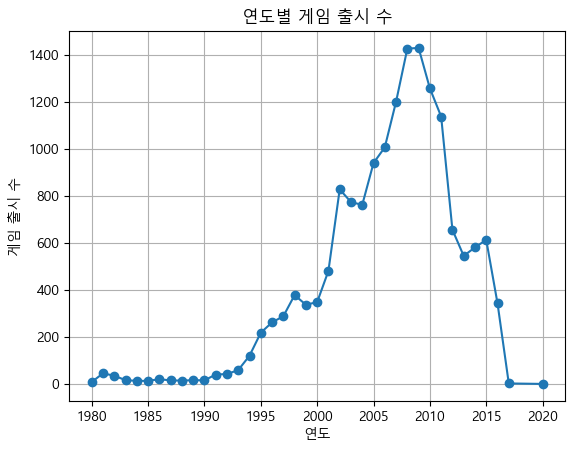

In [20]:
# sort_index() : 행 인덱스 기준으로 정렬(오름차순), df인 경우 axis=1 열 인덱스 기준으로 정렬 가능
size_by_year= df.groupby('Year').size().sort_index()
plt.rc('font', family='malgun Gothic') # 한글 설정

plt.figure()
size_by_year.plot(kind='line', marker='o')
plt.title('연도별 게임 출시 수')
plt.xlabel('연도')
plt.ylabel('게임 출시 수')
plt.grid(True)
plt.show()

# year_agg_desc = df.groupby('Year')['Name'].agg(['count']).sort_values(by="Year", ascending=False)
# year_agg_desc.plot(title="Game Per Year" ,ylabel="Count", xlabel="Year")

문제 5. 플랫폼별 전 세계 판매량
- 플랫폼(Platform) 별로 Global_Sales를 합산하고, 판매량이 높은 순으로 TOP 10을 막대그래프로 시각화하시오.

<Axes: xlabel='Platform'>

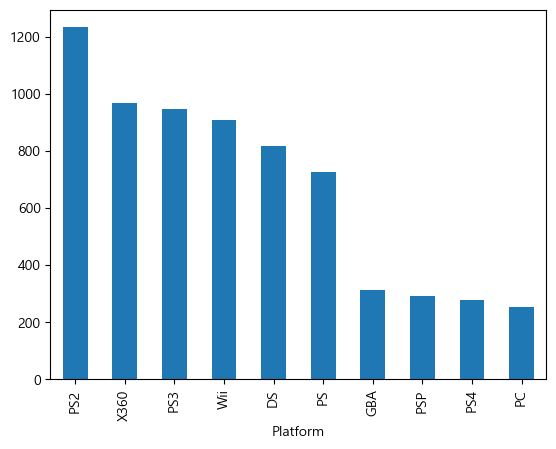

In [21]:
# GS_df = df.groupby('Platform')['Global_Sales'].agg(['count']).sort_values(by="count", ascending=False)
GS_df = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
GS_df = GS_df.head(n=10)

plt.figure()
GS_df.plot(kind='bar')
# plt.bar(GS_df.index,
#         GS_df['count'],
#         color = 'Yellow',
#         )
# plt.title('Global_Sales_Game')
# plt.ylabel('Global_Sales')
# plt.xticks(rotation=45)

문제 6. 가장 많이 판매된 장르
- 장르별 Global_Sales 총합을 구해 가장 높은 장르를 찾으시오.
- 장르별 판매 비중을 파이차트로 시각화하시오.

Text(0.5, 1.0, '장르 별 글로별 판매 비중 (Top6 + Others)')

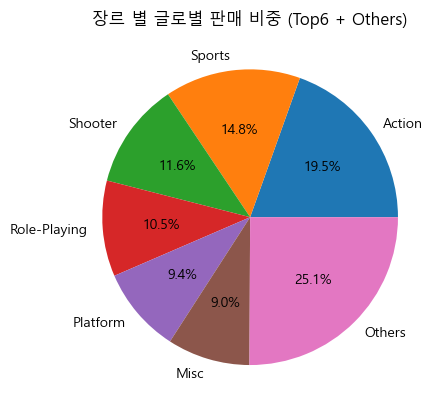

In [22]:
# df_Genre_sales = df.groupby('Genre')['Global_Sales'].agg(['sum']).sort_values(by='sum', ascending=False)
# print(df_Genre_sales)
df_Genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
# 파이 차트
# => 상위 6개 장르, 나머지는 Other
top6_genres = df_Genre_sales.head(6)
others = df_Genre_sales[6:].sum()

pie_values = top6_genres.tolist() + [others]
pie_labels = top6_genres.index.tolist() + ['Others']

plt.figure()
plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%')
plt.title("장르 별 글로별 판매 비중 (Top6 + Others)")
# print(df_Genre_sales.head(n=1).index[0])
# df_Genre_sales['sum'].plot(title='Global_Sales_Genre', xlabel='sum', ylabel='Genre', kind='pie')

문제 7. Publisher 별 평균 판매량
- Publisher 별 평균 Global_Sales를 구하고, 상위 10개만 출력하시오.

In [23]:
# df_pub_GSales = df.groupby('Publisher')['Global_Sales'].agg('mean').sort_values(ascending=False)
df_pub_GSales = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
print(df_pub_GSales.head(n=10))

# TODO: 최소 5개 이상 발매한 Publisher만 인정하기

Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.563836
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64


문제 8. 특정 Publisher 집중 분석
- `Nintendo` 또는 `Electronic Arts` 중 하나를 선택하여, 연도별 Global_Sales 추세를 선 그래프로 나타내시오.

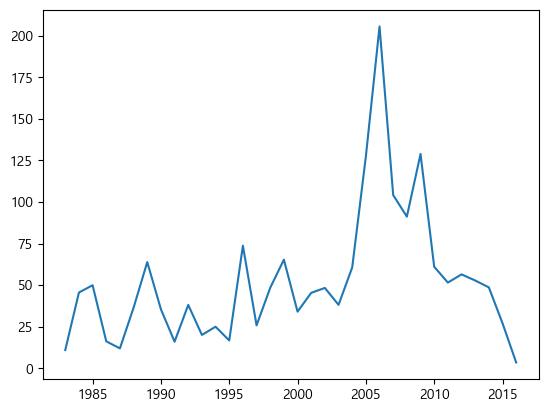

In [24]:
publisher = 'Nintendo'

pub_df = df[df['Publisher'] == publisher]

sale_by_sort= pub_df.groupby('Year')['Global_Sales'].sum().sort_index()

plt.figure()
plt.plot(sale_by_sort)

문제 9. Publisher 별 가장 많이 발매한 장르
- 각 Publisher가 가장 많이 만든 장르는 무엇인지 구하시오. (Publisher 별로 Genre count의 최대값 찾기)

[hint]
`groupby(['Publisher', 'Genre']).size().reset_index()`

In [25]:
# Publisher, Genre 조합하여 발매 수
df_pg = df.groupby(['Publisher', 'Genre']).size().reset_index(name='count')

# 각 Publisher 별 발매수가 가장 많은 Genre 조회
idx = df_pg.groupby('Publisher')['count'].idxmax()
# => 각 Publisher 별 발매수(count)가 가장 큰 값을 가진 행의 인덱스
df_pg.loc[idx].sort_values('count', ascending=False).reset_index(drop=True)

,Publisher,Genre,count
0,Electronic Arts,Sports,554
1,Activision,Action,308
2,Konami Digital Entertainment,Sports,279
3,Namco Bandai Games,Action,247
4,THQ,Action,193
...,...,...,...
571,Xing Entertainment,Fighting,1
572,49Games,Sports,1
573,2D Boy,Puzzle,1
574,1C Company,Racing,1


문제 10. 지역별 판매량 비교
- NA_Sales, EU_Sales, JP_Sales, Other_Sales 전 세계 합을 비교하여 그래프로 표현하시오.

Text(0.5, 1.0, '지역별 총 판매량')

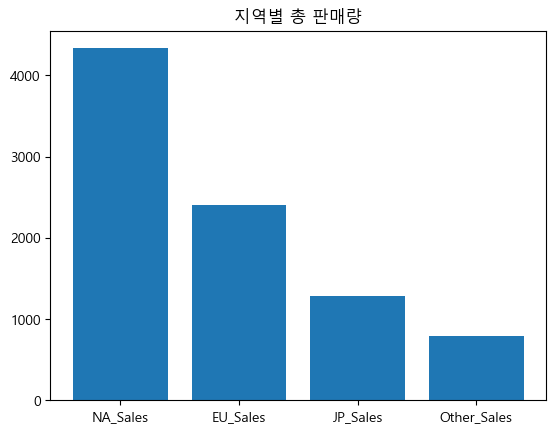

In [26]:
# 각 컬럼(지역) 별 총합
region_sum = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# pie,bar
plt.figure()

plt.bar(x=region_sum.index, height=region_sum)
plt.title('지역별 총 판매량')

문제 11. 국가별로 인기 있는 장르
- NA / EU / JP 각각 판매량이 가장 높은 장르를 구하시오.

In [ ]:
# NA국가 판매량이 높은 장르
na_top = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).head(1)

# EU 국가 판매량이 높은 장르
eu_top = df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).head(1)

# JP 국가 판매량이 가장 높은 장르
jp_top = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).head(1)


print(na_top)
print(eu_top)
print(jp_top)

문제 12. 연도 + 장르 + 플랫폼 종합 분석
- 특정 장르를 선택하여 
    - 연도별 출시 수
    - 플랫폼별 판매량 TOP5 
    를 각각 그래프로 시각화 하시오
- 결과를 확인하여 해당 장르의 트렌드를 3문장으로 정리하시오.

In [ ]:
# 특정 장르 선택 => Action
genre = 'Action'
act_df = df[df['Genre'] == genre]

# * 연도별 출시 수
size_by_year = act_df.groupby('Year').size().sort_index()
# 그래프 표시 : Bar
plt.figure()
plt.bar(size_by_year.index, size_by_year)
plt.title(f'{genre} 장르의 연도별 출시 수')
plt.xlabel('연도')
plt.ylabel('출시수')

# * 플랫폼별 판매량 TOP5
sales_by_platform_top5 = act_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)

# 그래프 표시 : Bar
plt.figure()
plt.bar(x=sales_by_platform_top5.index, height=sales_by_platform_top5)
plt.title(f'{genre} 장르의 플랫폼별 판매량 TOP5')
plt.xlabel('플랫폼')
plt.ylabel('판매량')